In [3]:
# Importando as bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import cm

# Bibliotecas Scikit Learn necessárias:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

# Usando função mágica para plotagem
%matplotlib inline

In [4]:
# Importando as FEATURES e os ATRIBUTOS:
df = pd.read_csv('reg_poli.csv', header=None)

# Definindo o número de amostras:
M = len(df[0].to_numpy())

# Definindo os valores de ENTRADA (features):
x = (df[0].to_numpy()).reshape(M, 1)

# Definindo os valores de SAÍDA (target):
y = (df[1].to_numpy()).reshape(M, 1)

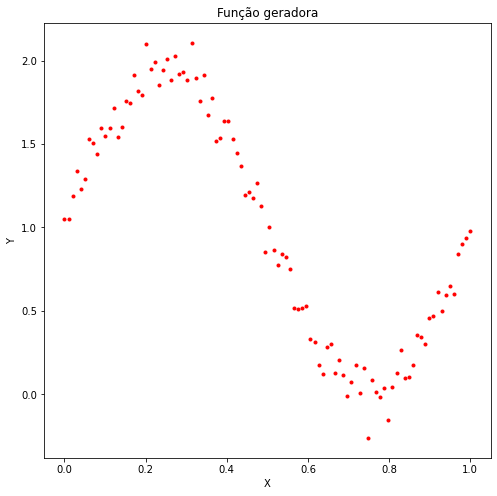

In [5]:
# Plotando o GRÁFICO:

fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, 'r.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função geradora')
plt.show()

# Holdout

In [6]:
# Definindo o tamanho (%) do conjunto de validação:
v_size = 30

# Definindo se a função possui BIAS:
bias = True

# Fazendo a separação do conjunto de TREINAMENTO e VALIDAÇÃO
x_t, x_v, y_t, y_v = train_test_split(x, y, test_size=v_size)

In [7]:
# Imprimindo a segregação dos dados em TREINAMENTO e VALIDAÇÃO:
print('{} dos dados são para treinamento, enquanto {} são para validação.'.format(len(y_t), len(y_v)))

70 dos dados são para treinamento, enquanto 30 são para validação.


In [12]:
# Criando o vetor de predição:
mean_vec = []

# Criando o vetor de treinamento:
train_vec = []

# LOOP
for d in range(1, 13):
    
    # Instancia o polinomio
    poly_features = PolynomialFeatures(degree=d, include_bias=bias)
    
    # Instancia o padronizador:
    std_scaler = StandardScaler()
    
    # Instancia a Regressão Linear
    lin_reg = LinearRegression()
    
    # Cria uma série de ações:
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    # Aplica a regressão polinomial nos dados de TREINAMENTO
    polynomial_regression.fit(x_t, y_t)
    
    # Encontra o valor de PREDIÇÃO pelo conjunto de TREINAMENTO:
    y_t_p = polynomial_regression.predict(x_t)
    
    # Encontra o valor de PREDIÇÃO pelo conjunto de VALIDAÇÃO;
    y_v_p = polynomial_regression.predict(x_v)
    
    # 
    train_vec.append(np.sqrt(mean_squared_error(y_t, y_t_p)))
    
    # 
    mean_vec.append(np.sqrt(mean_squared_error(y_v, y_v_p)))

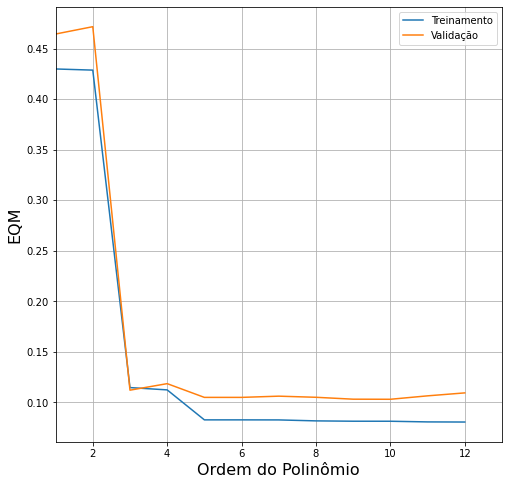

In [13]:
# Plotando grafico de treinamento x validação

plt.figure(figsize=(8, 8))
plt.plot(range(1, 13), train_vec, label='Treinamento')
plt.plot(range(1, 13), mean_vec, label='Validação')
plt.xlabel('Ordem do Polinômio', fontsize=16)
plt.ylabel('EQM', fontsize=16)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 13])
plt.legend()
plt.grid()
plt.show()

# K-fold

In [ ]:
# Definindo quantos folds serão utilizados
folds = 10

# Definindo se haverá randomização
shuffle_opc = True

# Executa o K-fold:
k_fold = KFold(n_splits=folds, shuffle=shuffle_opc])

In [ ]:
# Criando a matriz de treinamento:
train_vec = []

# Criando a matriz de predição:
mean_vec = []

for d in range(1, 13):
    
    # Instancia o polinomio
    poly_features = PolynomialFeatures(degree=d, include_bias=bias)
    
    # Instancia o padronizador
    std_scaler = StandardScaler()
    
    # Instancia a regressão linear
    lin_reg = LinearRegression()
    
    # Define a série de ações
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
        
    ])
    
    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=k_fold)
    
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    train_vec.append(scores.std())

In [ ]:
# Plotando os gráficos

plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec,  label='Validação')
plt.xlabel('Ordem do Polinômio', fontsize=16)
plt.ylabel('EQM', fontsize=16)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), train_vec,  label='Treinamento')
plt.xlabel('Ordem do Polinômio', fontsize=16)
plt.ylabel('Desvio Padrão', fontsize=16)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

# Leave one out

In [15]:
# Instancio o Leave One Out
l_one = LeaveOneOut()

In [16]:
# Criação do vetor de treinamento:
train_vec = []

# Criação do vetor de validação
mean_vec = []

for d in range(1, 13):
    
    # Instancia o polinomio
    poly_features = PolynomialFeatures(degree=d, include_bias=bias)
    
    # Instancia o padronizador
    std_scaler = StandardScaler()
    
    # Instancia a regressão linear
    lin_reg = LinearRegression()
    
    # Definindo a série de ações:
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
        
    ])
    
    lin_scores = cross_val_score(polynomial_regression, x, y, scoring="neg_mean_squared_error", cv=l_one)
    
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    train_vec.append(scores.std())

In [ ]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec,  label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média da raíz do erro quadrático médio', fontsize=14)
plt.yscale('log')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
#plt.ylim([0.78, 0.81])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), train_vec,  label='Treinamento')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Curvas de aprendizado

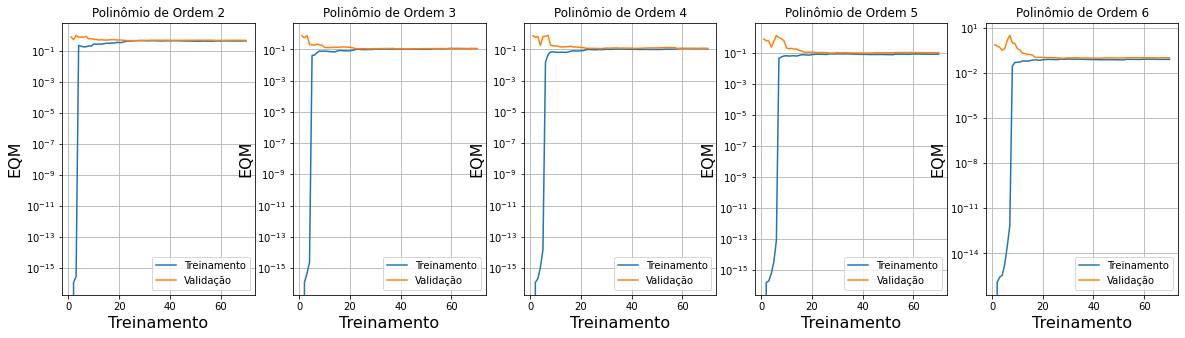

In [9]:
# Escolha dos graus que serão utilizados:
degrees = [2,3,4,5,6]

# Criação de uma figura
plt.figure(figsize=(20, 5))

# LOOP
for i in range(len(degrees)):
    
    # Definição da FIGURA
    ax = plt.subplot(1, len(degrees), i + 1)
    
    # Instancia o polinomio
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=bias)
    
    # Instancia o padronizador
    std_scaler = StandardScaler()
    
    # Instacia a regressão linear
    lin_reg = LinearRegression()
    
    # Cria a sequencia de ações
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    
    # Criação da matriz do ERRO de TREINAMENTO:
    train_error = []
    
    # Criação da matriz do ERRO de VALIDAÇÃO:
    valid_error = []
    
    for m in range(1, len(x_t)+1):
        
        # Aplica a regressão linear
        polynomial_regression.fit(x_t[:m], y_t[:m])
        
        # Usa o modelo treinado para avaliar a predição do conjunto de treinamento
        y_t_p = polynomial_regression.predict(x_t[:m])
        
        # Usa o modelo trainado para avaliar a predição do conjunto de validação
        y_v_p = polynomial_regression.predict(x_v)
        
        # Executa a MSE para o conjunto de treinamento:
        train_error.append(mean_squared_error(y_t[:m], y_t_p))
        
        # Executa o MSE para o conjunto de validação:
        valid_error.append(mean_squared_error(y_v, y_v_p))
        
    plt.plot(range(1,len(x_t)+1), np.sqrt(train_error), label='Treinamento')
    plt.plot(range(1,len(x_t)+1), np.sqrt(valid_error), label='Validação')
    plt.yscale('log')
    plt.xlabel('Treinamento', fontsize=16)
    plt.ylabel('EQM', fontsize=16)
    plt.grid()
    plt.title('Polinômio de Ordem '+str(degrees[i]))
    plt.legend(loc='best')

* Dê dois cliques sobre a imagem para amplicar

# Treinamento do MODELO

In [10]:
# Encolha do GRAU do POLINOMIO para TREINAMENTO:
grau = 3

# Definição se haverá ou não BIAS (offset):
bias = False

# Instancia o polinomio
poly_features = PolynomialFeatures(degree=grau, include_bias=bias)

# Instancia o padronizador
std_scaler = StandardScaler()

# Instancia a regressão linear
lin_reg = LinearRegression()

# Definindo a série dde ações
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

# Treinamento do modelo
polynomial_regression.fit(x, y)

# Predição
y_pred = polynomial_regression.predict(x)

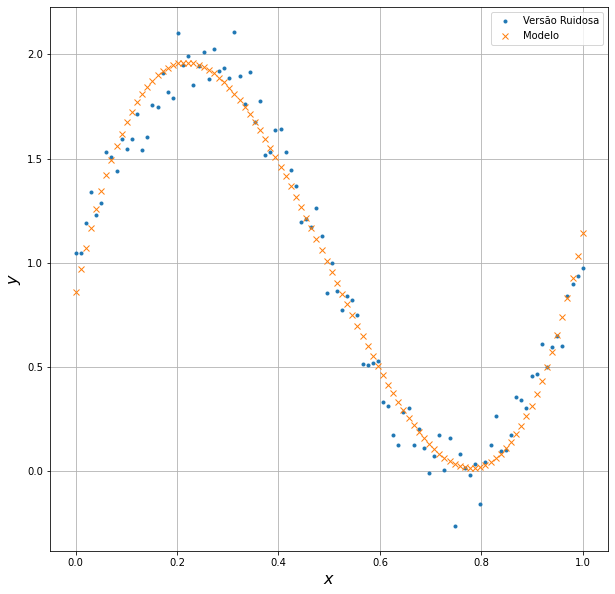

In [11]:
# Plotando o grafico pontos  do arquivo reg_poli.csv  x valores encontrados no modelo

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Versão Ruidosa')
plt.plot(x, y_pred, 'x', label='Modelo')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.legend()
plt.grid()
plt.show()